In [15]:
import networkx as nx
import numpy as np

# Simple Tests

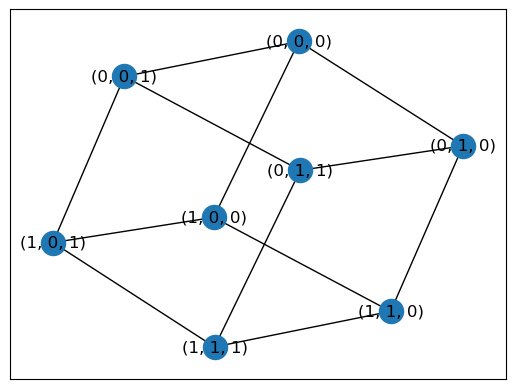

In [2]:
G=nx.hypercube_graph(3)
nx.draw_networkx(G)

In [3]:
G.nodes()

NodeView(((0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)))

In [4]:
X=G.nodes()

In [5]:
F=nx.Graph()

In [6]:
F.add_nodes_from(X)

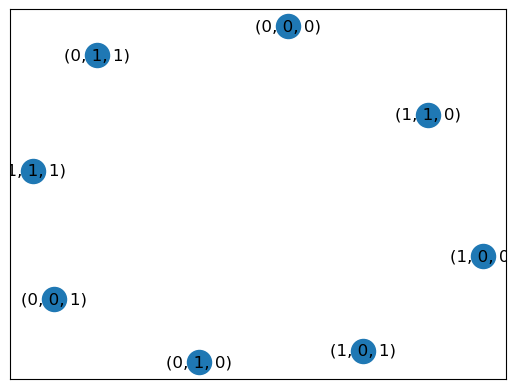

In [7]:
nx.draw_networkx(F)

In [8]:
F.adj

AdjacencyView({(0, 0, 0): {}, (0, 0, 1): {}, (0, 1, 0): {}, (0, 1, 1): {}, (1, 0, 0): {}, (1, 0, 1): {}, (1, 1, 0): {}, (1, 1, 1): {}})

In [26]:
for u in F.nodes():
    F.nodes[u]["pos"]=u

In [27]:
F.add_edges_from(nx.geometric_edges(F, 1))

In [11]:
F.edges[(0,0,0),(0,0,1)]["weight"]=14

In [12]:
F.adj

AdjacencyView({(0, 0, 0): {(0, 0, 1): {'weight': 14}, (0, 1, 0): {}, (1, 0, 0): {}}, (0, 0, 1): {(0, 0, 0): {'weight': 14}, (0, 1, 1): {}, (1, 0, 1): {}}, (0, 1, 0): {(0, 0, 0): {}, (0, 1, 1): {}, (1, 1, 0): {}}, (0, 1, 1): {(0, 0, 1): {}, (0, 1, 0): {}, (1, 1, 1): {}}, (1, 0, 0): {(0, 0, 0): {}, (1, 0, 1): {}, (1, 1, 0): {}}, (1, 0, 1): {(0, 0, 1): {}, (1, 0, 0): {}, (1, 1, 1): {}}, (1, 1, 0): {(0, 1, 0): {}, (1, 0, 0): {}, (1, 1, 1): {}}, (1, 1, 1): {(0, 1, 1): {}, (1, 0, 1): {}, (1, 1, 0): {}}})

In [72]:
coords = list(map(tuple, np.genfromtxt("coord_0.dat", delimiter=" ")))
types = np.genfromtxt("mol_types_0.dat", delimiter=" ")
energies = np.genfromtxt("site_energies_0.dat", delimiter=" ")

Types = dict(zip(list(F.nodes()), np.genfromtxt("mol_types_0.dat", delimiter=" ")))
Energies = dict(zip(list(F.nodes()), np.genfromtxt("site_energies_0.dat", delimiter=" ")))
Pos = dict(zip(list(F.nodes()), coords))

F=nx.Graph()
F.add_nodes_from(coords)



nx.set_node_attributes(F, Pos, "pos")
nx.set_node_attributes(F, Types, "Type")
nx.set_node_attributes(F, Energies, "Energy")

# Implementation

Laufzeittests zeigen, dass die Schleife schneller als die Verwendung der einzelnen Networkx-Funktionen ist

In [76]:
def Construct(Coo, Typ, Ener):
    #Read coordinates from file
    coords = list(map(tuple, np.genfromtxt(Coo, delimiter=" ")))
    #Build Graph
    F=nx.Graph()
    F.add_nodes_from(coords)
    #Read Attributes
    types = np.genfromtxt(Typ, delimiter=" ")
    energies = np.genfromtxt(Ener, delimiter=" ")
    #Set Attributes
    i=0
    for u in F.nodes():
        F.nodes[u]["pos"]=u
        F.nodes[u]["Type"]=types[i]
        F.nodes[u]["Energy"]=energies[i]
        i+=1  
    #Construct Edges
    F.add_edges_from(nx.geometric_edges(F, 1))
    return F


#Gitter1=Construct2("coord_0.dat", "mol_types_0.dat", "site_energies_0.dat")